In [1]:
from sklearn.datasets import load_boston,load_breast_cancer
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import joblib
#import itertools

In [2]:
from pandasxtend.catdap import CATDAP01,CATDAP02

In [3]:
#load_breast_cancer()

In [4]:
X = load_boston()["data"]
y = load_boston()["target"]
cols = load_boston()["feature_names"]

X_df = pd.DataFrame(X)
X_df.columns = cols

In [5]:
np.random.seed(1111)
X_df["rand"] = np.random.choice([1,2,3,4,5],X_df.shape[0])

In [6]:
dic_date = {1:"19900101",2:"20000202",3:"20100303",4:"20200404",5:np.nan}
dic_str = {1:"A",2:"BB",3:"CCC",4:"DDDD",5:"EEEEE"}

X_df["sample_datetime"] = pd.to_datetime(X_df["rand"].map(dic_date))
X_df["sample_str"] = X_df["rand"].map(dic_str)

In [7]:
X_df["flg_over_age"] = (X_df["AGE"] >= X_df["AGE"].mean()).astype(int)

X_df["sample_1"] = X_df["LSTAT"]
X_df.loc[X_df["sample_str"].isin(["EEEEE","BB"]),"sample_1"] = 0

In [10]:
bun_df = X_df.copy()
bun_df["target"] = y

In [11]:
mean_target = bun_df["target"].mean()
bun_df["flg_target"] = (bun_df["target"] >= mean_target).astype(int)
#bun_df["flg_target"] = (bun_df["target"] < mean_target)

In [12]:
y_binary = (y > y.mean()).astype(int)

In [13]:
cat = CATDAP01()
cat.fit(X_df,y_binary)

AIC calculation is finished


In [14]:
cat.AIC_table

feature_name  missing_ratio        AIC           category    0    1  All  \
0         LSTAT            0.0 -293.24139    1: [1.73, 6.29)    5   96  101   
1         LSTAT            0.0 -293.24139    2: [6.29, 9.53)   32   69  101   
2         LSTAT            0.0 -293.24139   3: [9.53, 13.33)   70   31  101   
3         LSTAT            0.0 -293.24139  4: [13.33, 18.06)   91    9  100   
4         LSTAT            0.0 -293.24139  5: [18.06, 38.97)   99    4  103   
..          ...            ...        ...                ...  ...  ...  ...   
85   sample_str            0.0    5.29496              2: BB   47   39   86   
86   sample_str            0.0    5.29496             3: CCC   54   43   97   
87   sample_str            0.0    5.29496            4: DDDD   64   43  107   
88   sample_str            0.0    5.29496           5: EEEEE   76   42  118   
89   sample_str            0.0    5.29496                All  297  209  506   

    Ratio_0  Ratio_1  
0   0.04950  0.95050  
1   0.31683  0.68317  
2   0.69307  0.30693  
3   0.91000  0.09000  
4   0.96117  0.03883  
..      ...      ...  
85  0.54651  0.45349  
86  0.55670  0.44330  
87  0.59813  0.40187  
88  0.64407  0.35593  
89  0.58696  0.41304  

[90 rows x 9 columns]

In [15]:
cat.AIC_summary

feature_name        AIC
0             LSTAT -293.24139
1                RM -194.99423
2             INDUS -148.46079
3           PTRATIO -134.29559
4               NOX -115.21668
5               AGE  -92.56754
6          sample_1  -89.65247
7               TAX  -84.91045
8              CRIM  -80.39282
9                ZN  -79.77650
10              DIS  -59.70835
11                B  -38.65841
12              RAD   -7.83047
13             CHAS    0.00000
14     flg_over_age    0.00000
15  sample_datetime    3.65305
16             rand    3.79857
17       sample_str    5.29496

In [16]:
#cat.to_csv()

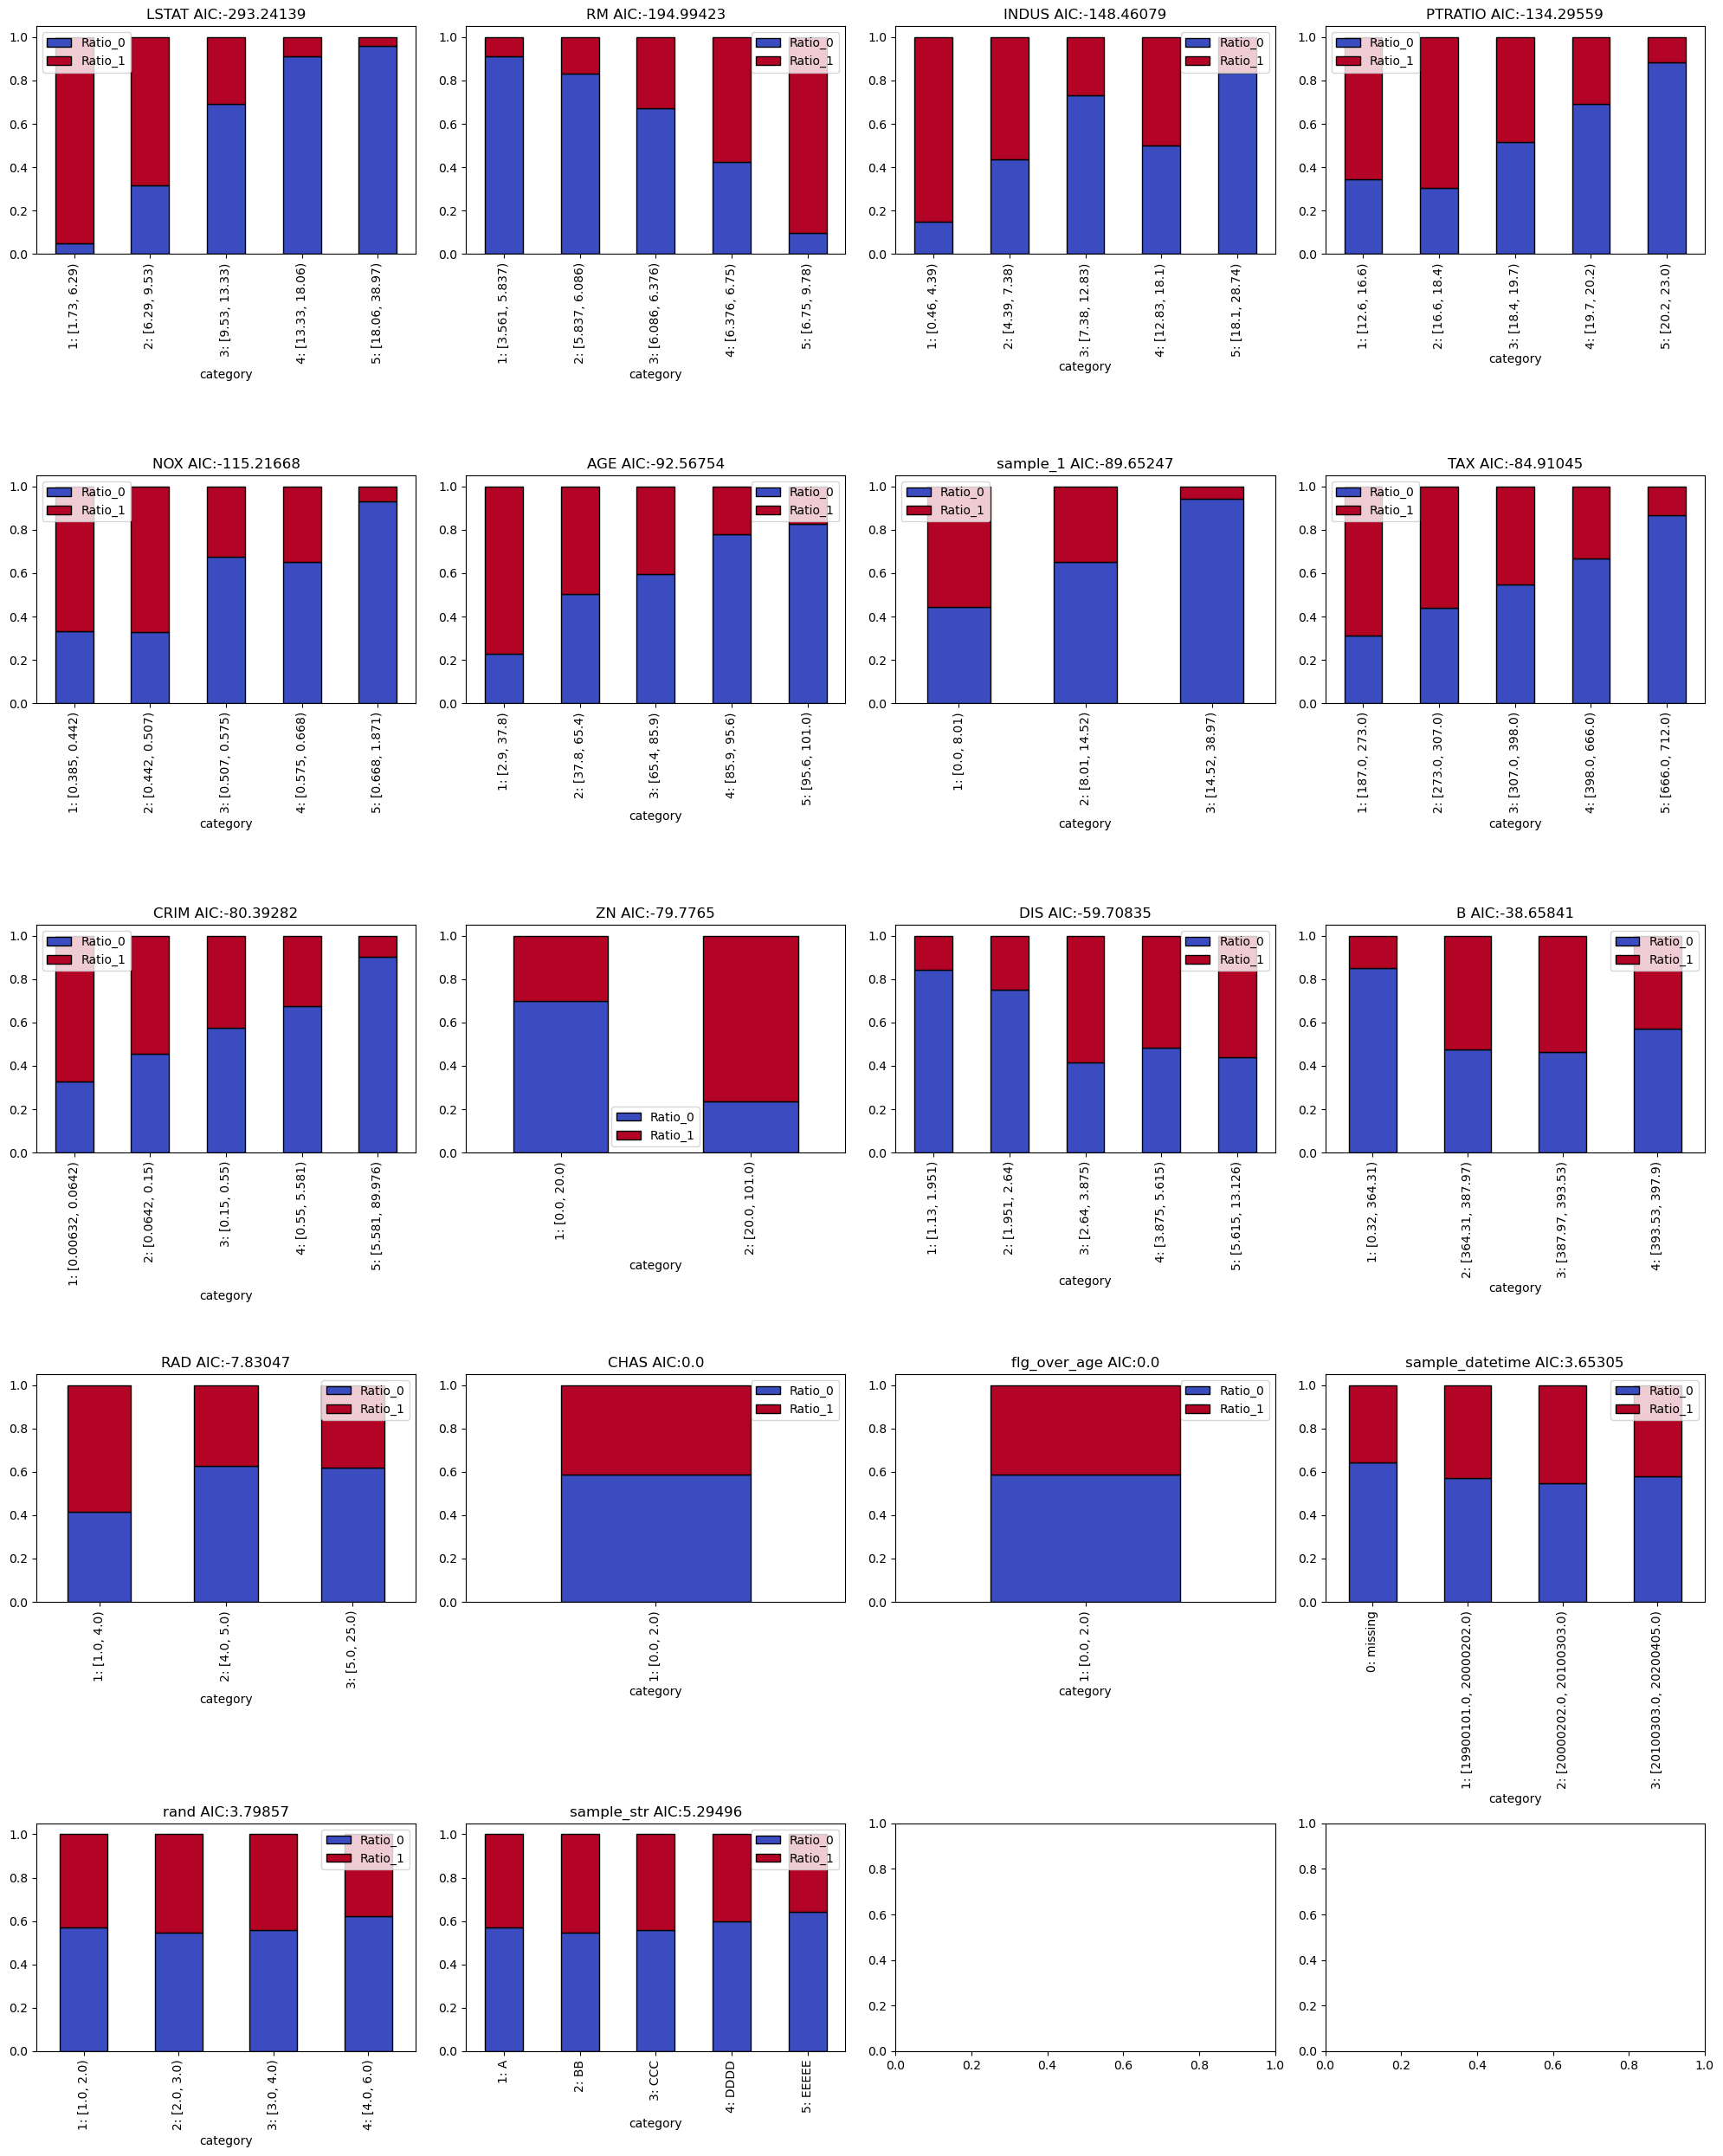

In [17]:
cat.plot()

In [18]:
cat1 = CATDAP01(y_type = "numeric")
cat1.fit(X_df,y)

AIC calculation is finished


In [19]:
#cat1.to_csv(file_name = "temp2")

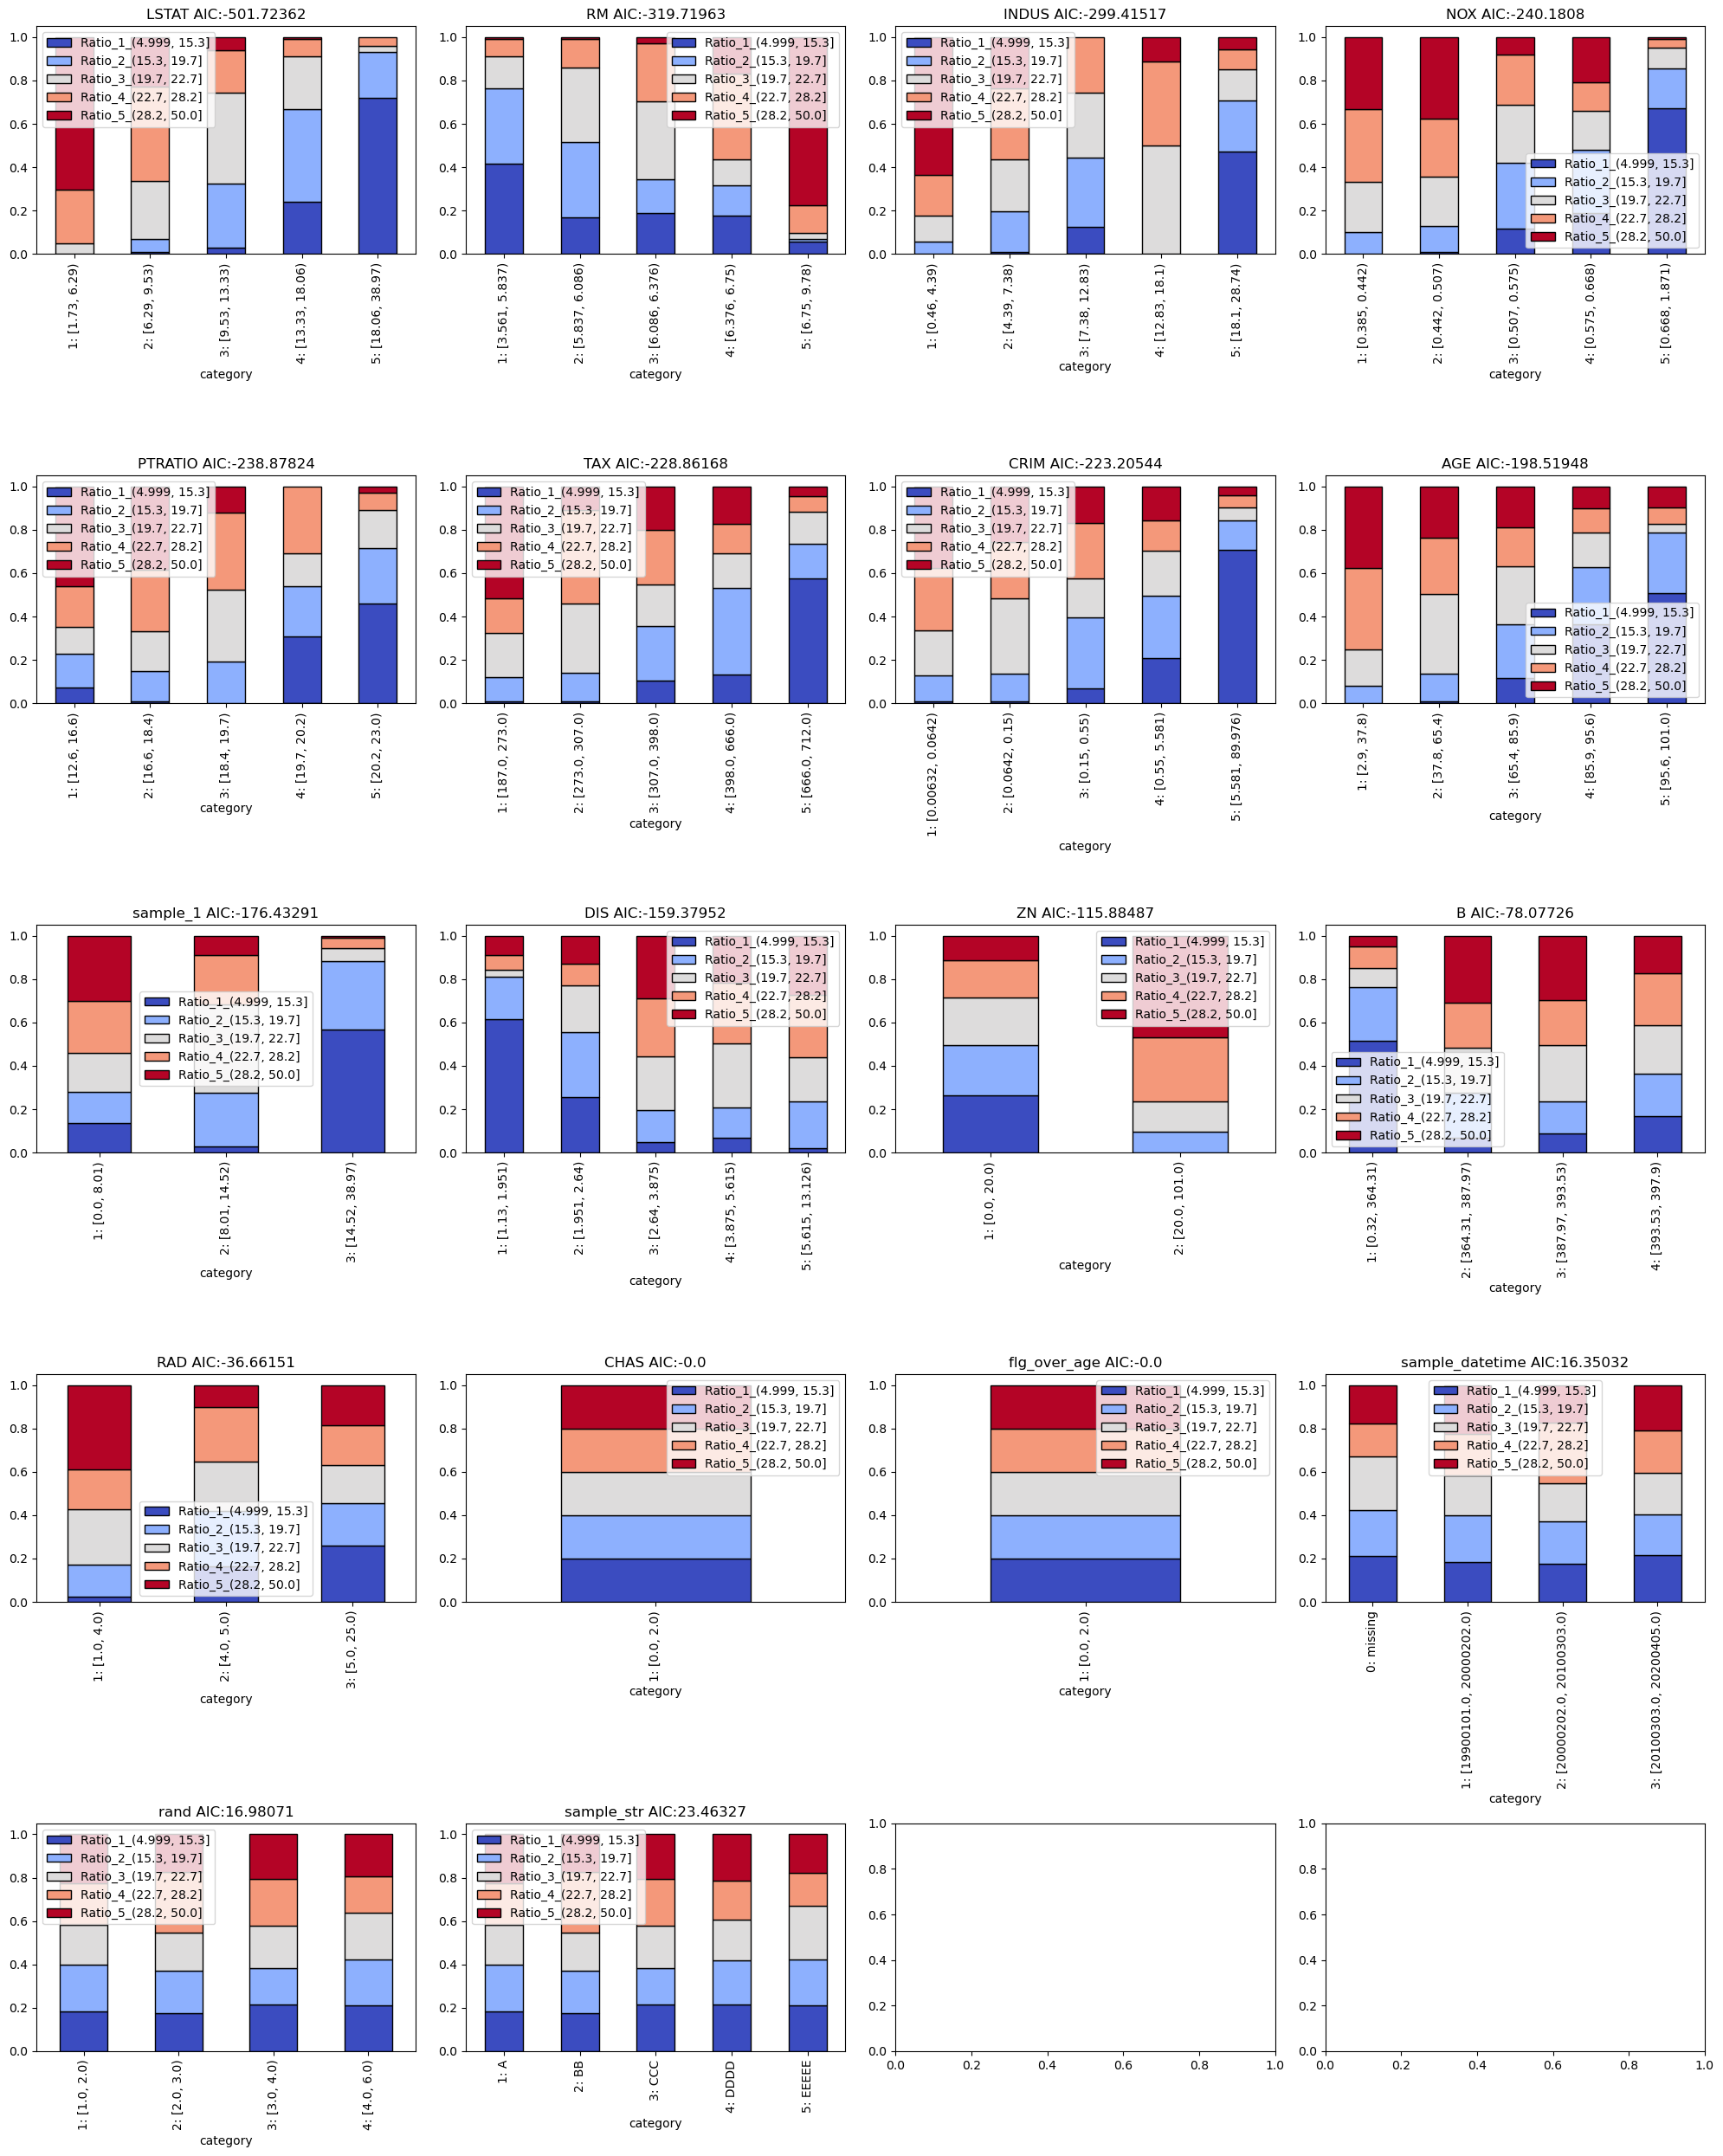

In [20]:
cat1.plot()

In [21]:
mm = pd.DataFrame()
mm["true"] = ["male"]
mm["hope"] = "male"
mm = mm.sample(749,replace = True)

fm = pd.DataFrame()
fm["true"] = ["female"]
fm["hope"] = "male"
fm = fm.sample(445,replace = True)

mf = pd.DataFrame()
mf["true"] = ["male"]
mf["hope"] = "female"
mf = mf.sample(83,replace = True)

ff = pd.DataFrame()
ff["true"] = ["female"]
ff["hope"] = "female"
ff = ff.sample(636,replace = True)

sample_df = pd.concat([mm,fm,mf,ff],axis = 0)

In [22]:
X_samp = sample_df[["true"]]
y_samp = sample_df["hope"]

In [23]:
cat_sample = CATDAP01()
cat_sample.fit(X_samp,y_samp)

AIC calculation is finished


In [24]:
cat_sample.AIC_summary
#-526.07768

feature_name        AIC
0         true -526.07768

In [25]:
cat_sample.AIC_table

feature_name  missing_ratio        AIC   category  female  male   All  \
0         true            0.0 -526.07768  1: female     636   445  1081   
1         true            0.0 -526.07768    2: male      83   749   832   
2         true            0.0 -526.07768        All     719  1194  1913   

   Ratio_female  Ratio_male  
0       0.58834     0.41166  
1       0.09976     0.90024  
2       0.37585     0.62415

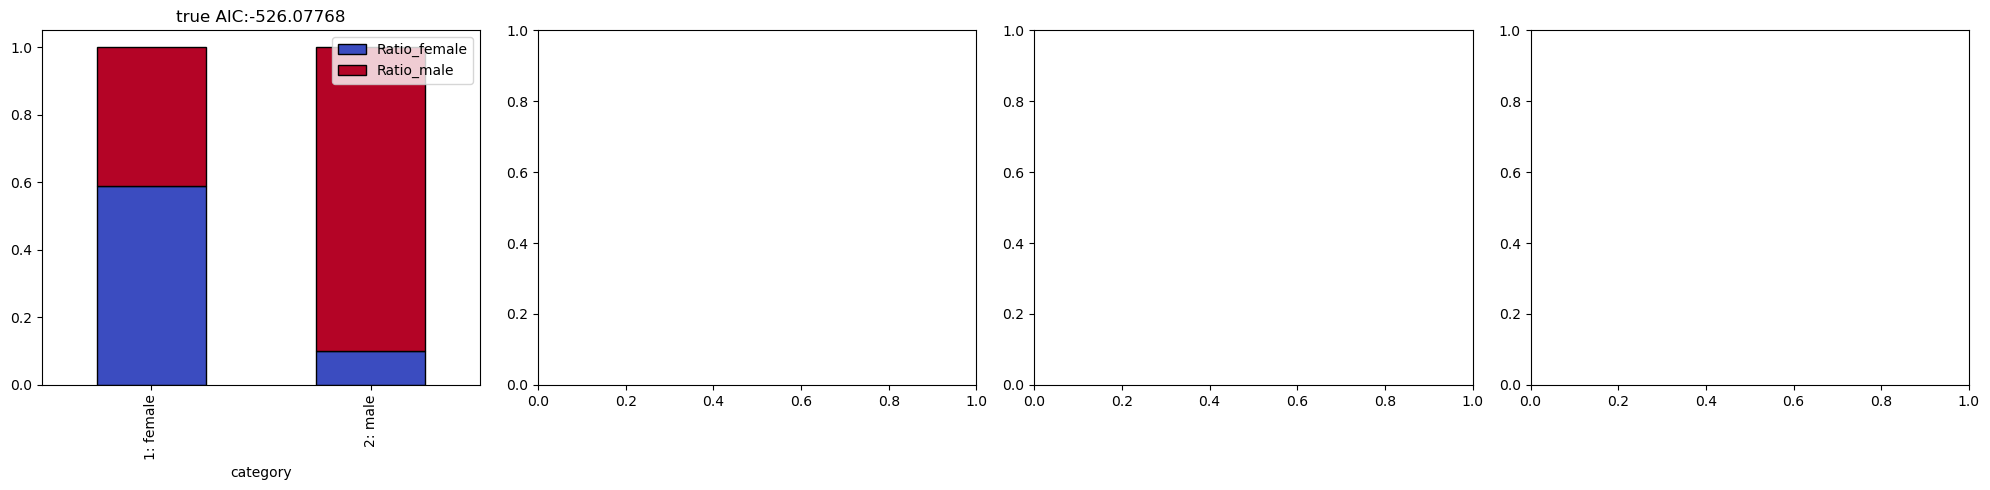

In [26]:
cat_sample.plot()

In [27]:
cat2 = CATDAP02(num_max_select_feature=2)
cat2.fit(X_df,y_binary)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.77s/it]

AIC calculation is finished


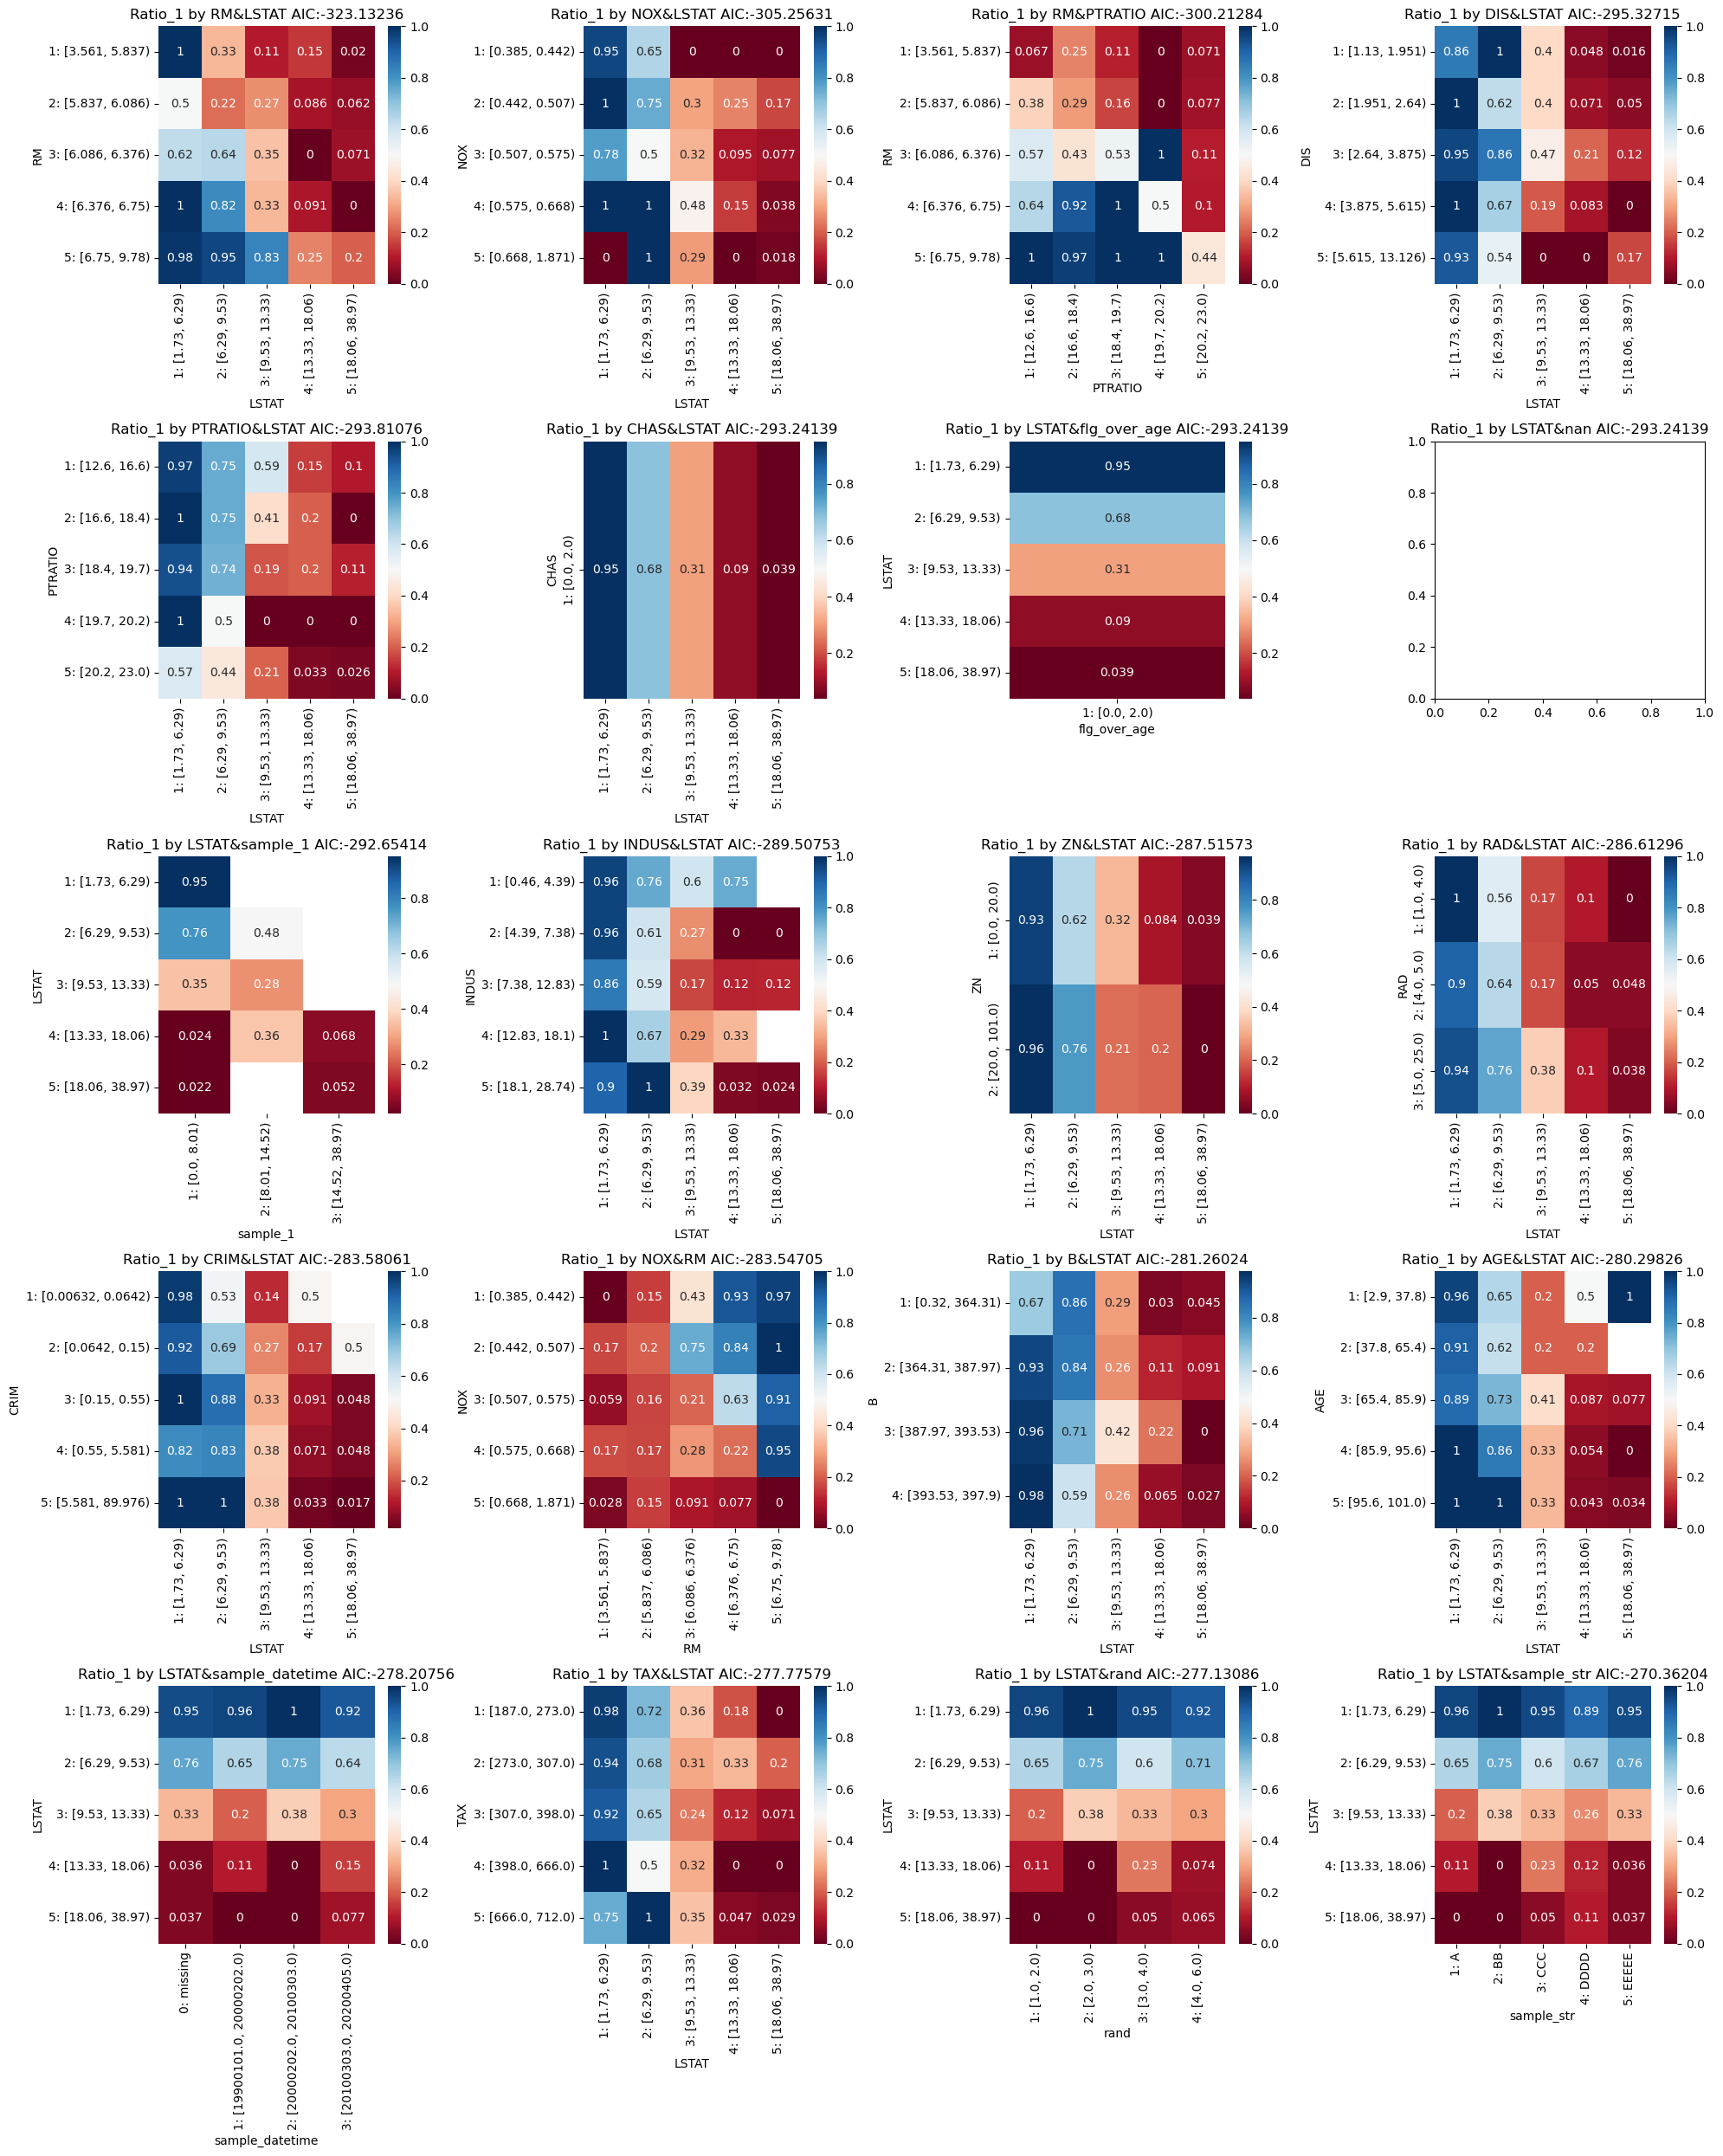

In [28]:
cat2.heatmap("Ratio_1")

In [29]:
cat2_2 = CATDAP02(y_type = "numeric")
cat2_2.fit(X_df,y)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.35s/it]

AIC calculation is finished


In [30]:
cat2_2.AIC_summary_all.head(20)

feature_name_1 feature_name_2        AIC
0              RM          LSTAT -541.30675
1           LSTAT   flg_over_age -501.72362
2            CHAS          LSTAT -501.72362
3           LSTAT            NaN -501.72362
4             TAX          LSTAT -501.31039
5         PTRATIO          LSTAT -497.52335
6           INDUS          LSTAT -489.78140
7              ZN          LSTAT -488.26377
8             RAD          LSTAT -484.49891
9             NOX          LSTAT -483.42254
10            NOX             RM -479.17223
11           CRIM          LSTAT -476.74696
12             RM        PTRATIO -475.17283
13              B          LSTAT -466.20563
14           CRIM             RM -466.11498
15          LSTAT       sample_1 -465.54025
16            DIS          LSTAT -463.84034
17             RM            TAX -461.17183
18          LSTAT           rand -443.18409
19             RM            AGE -441.62362

In [31]:
cat2_2.AIC_table_all.head(20)

feature_name_1 feature_name_2  missing_ratio_of_the_feature_1  \
0              RM          LSTAT                             0.0   
1              RM          LSTAT                             0.0   
2              RM          LSTAT                             0.0   
3              RM          LSTAT                             0.0   
4              RM          LSTAT                             0.0   
5              RM          LSTAT                             0.0   
6              RM          LSTAT                             0.0   
7              RM          LSTAT                             0.0   
8              RM          LSTAT                             0.0   
9              RM          LSTAT                             0.0   
10             RM          LSTAT                             0.0   
11             RM          LSTAT                             0.0   
12             RM          LSTAT                             0.0   
13             RM          LSTAT                             0.0   
14             RM          LSTAT                             0.0   
15             RM          LSTAT                             0.0   
16             RM          LSTAT                             0.0   
17             RM          LSTAT                             0.0   
18             RM          LSTAT                             0.0   
19             RM          LSTAT                             0.0   

    missing_ratio_of_the_feature_2        AIC         category_1  \
0                              0.0 -541.30675  1: [3.561, 5.837)   
1                              0.0 -541.30675  1: [3.561, 5.837)   
2                              0.0 -541.30675  1: [3.561, 5.837)   
3                              0.0 -541.30675  1: [3.561, 5.837)   
4                              0.0 -541.30675  1: [3.561, 5.837)   
5                              0.0 -541.30675  2: [5.837, 6.086)   
6                              0.0 -541.30675  2: [5.837, 6.086)   
7                              0.0 -541.30675  2: [5.837, 6.086)   
8                              0.0 -541.30675  2: [5.837, 6.086)   
9                              0.0 -541.30675  2: [5.837, 6.086)   
10                             0.0 -541.30675  3: [6.086, 6.376)   
11                             0.0 -541.30675  3: [6.086, 6.376)   
12                             0.0 -541.30675  3: [6.086, 6.376)   
13                             0.0 -541.30675  3: [6.086, 6.376)   
14                             0.0 -541.30675  3: [6.086, 6.376)   
15                             0.0 -541.30675   4: [6.376, 6.75)   
16                             0.0 -541.30675   4: [6.376, 6.75)   
17                             0.0 -541.30675   4: [6.376, 6.75)   
18                             0.0 -541.30675   4: [6.376, 6.75)   
19                             0.0 -541.30675   4: [6.376, 6.75)   

           category_2  1_(4.999, 15.3]  2_(15.3, 19.7]  3_(19.7, 22.7]  \
0     1: [1.73, 6.29)                0               0               0   
1     2: [6.29, 9.53)                0               1               1   
2    3: [9.53, 13.33)                2              11               4   
3   4: [13.33, 18.06)                4              11               8   
4   5: [18.06, 38.97)               36              12               2   
5     1: [1.73, 6.29)                0               0               1   
6     2: [6.29, 9.53)                1               4               9   
7    3: [9.53, 13.33)                1              11              13   
8   4: [13.33, 18.06)                5              15              12   
9   5: [18.06, 38.97)               10               5               0   
10    1: [1.73, 6.29)                0               0               3   
11    2: [6.29, 9.53)                0               0              10   
12   3: [9.53, 13.33)                0               4              18   
13  4: [13.33, 18.06)                8              11               4   
14  5: [18.06, 38.97)              

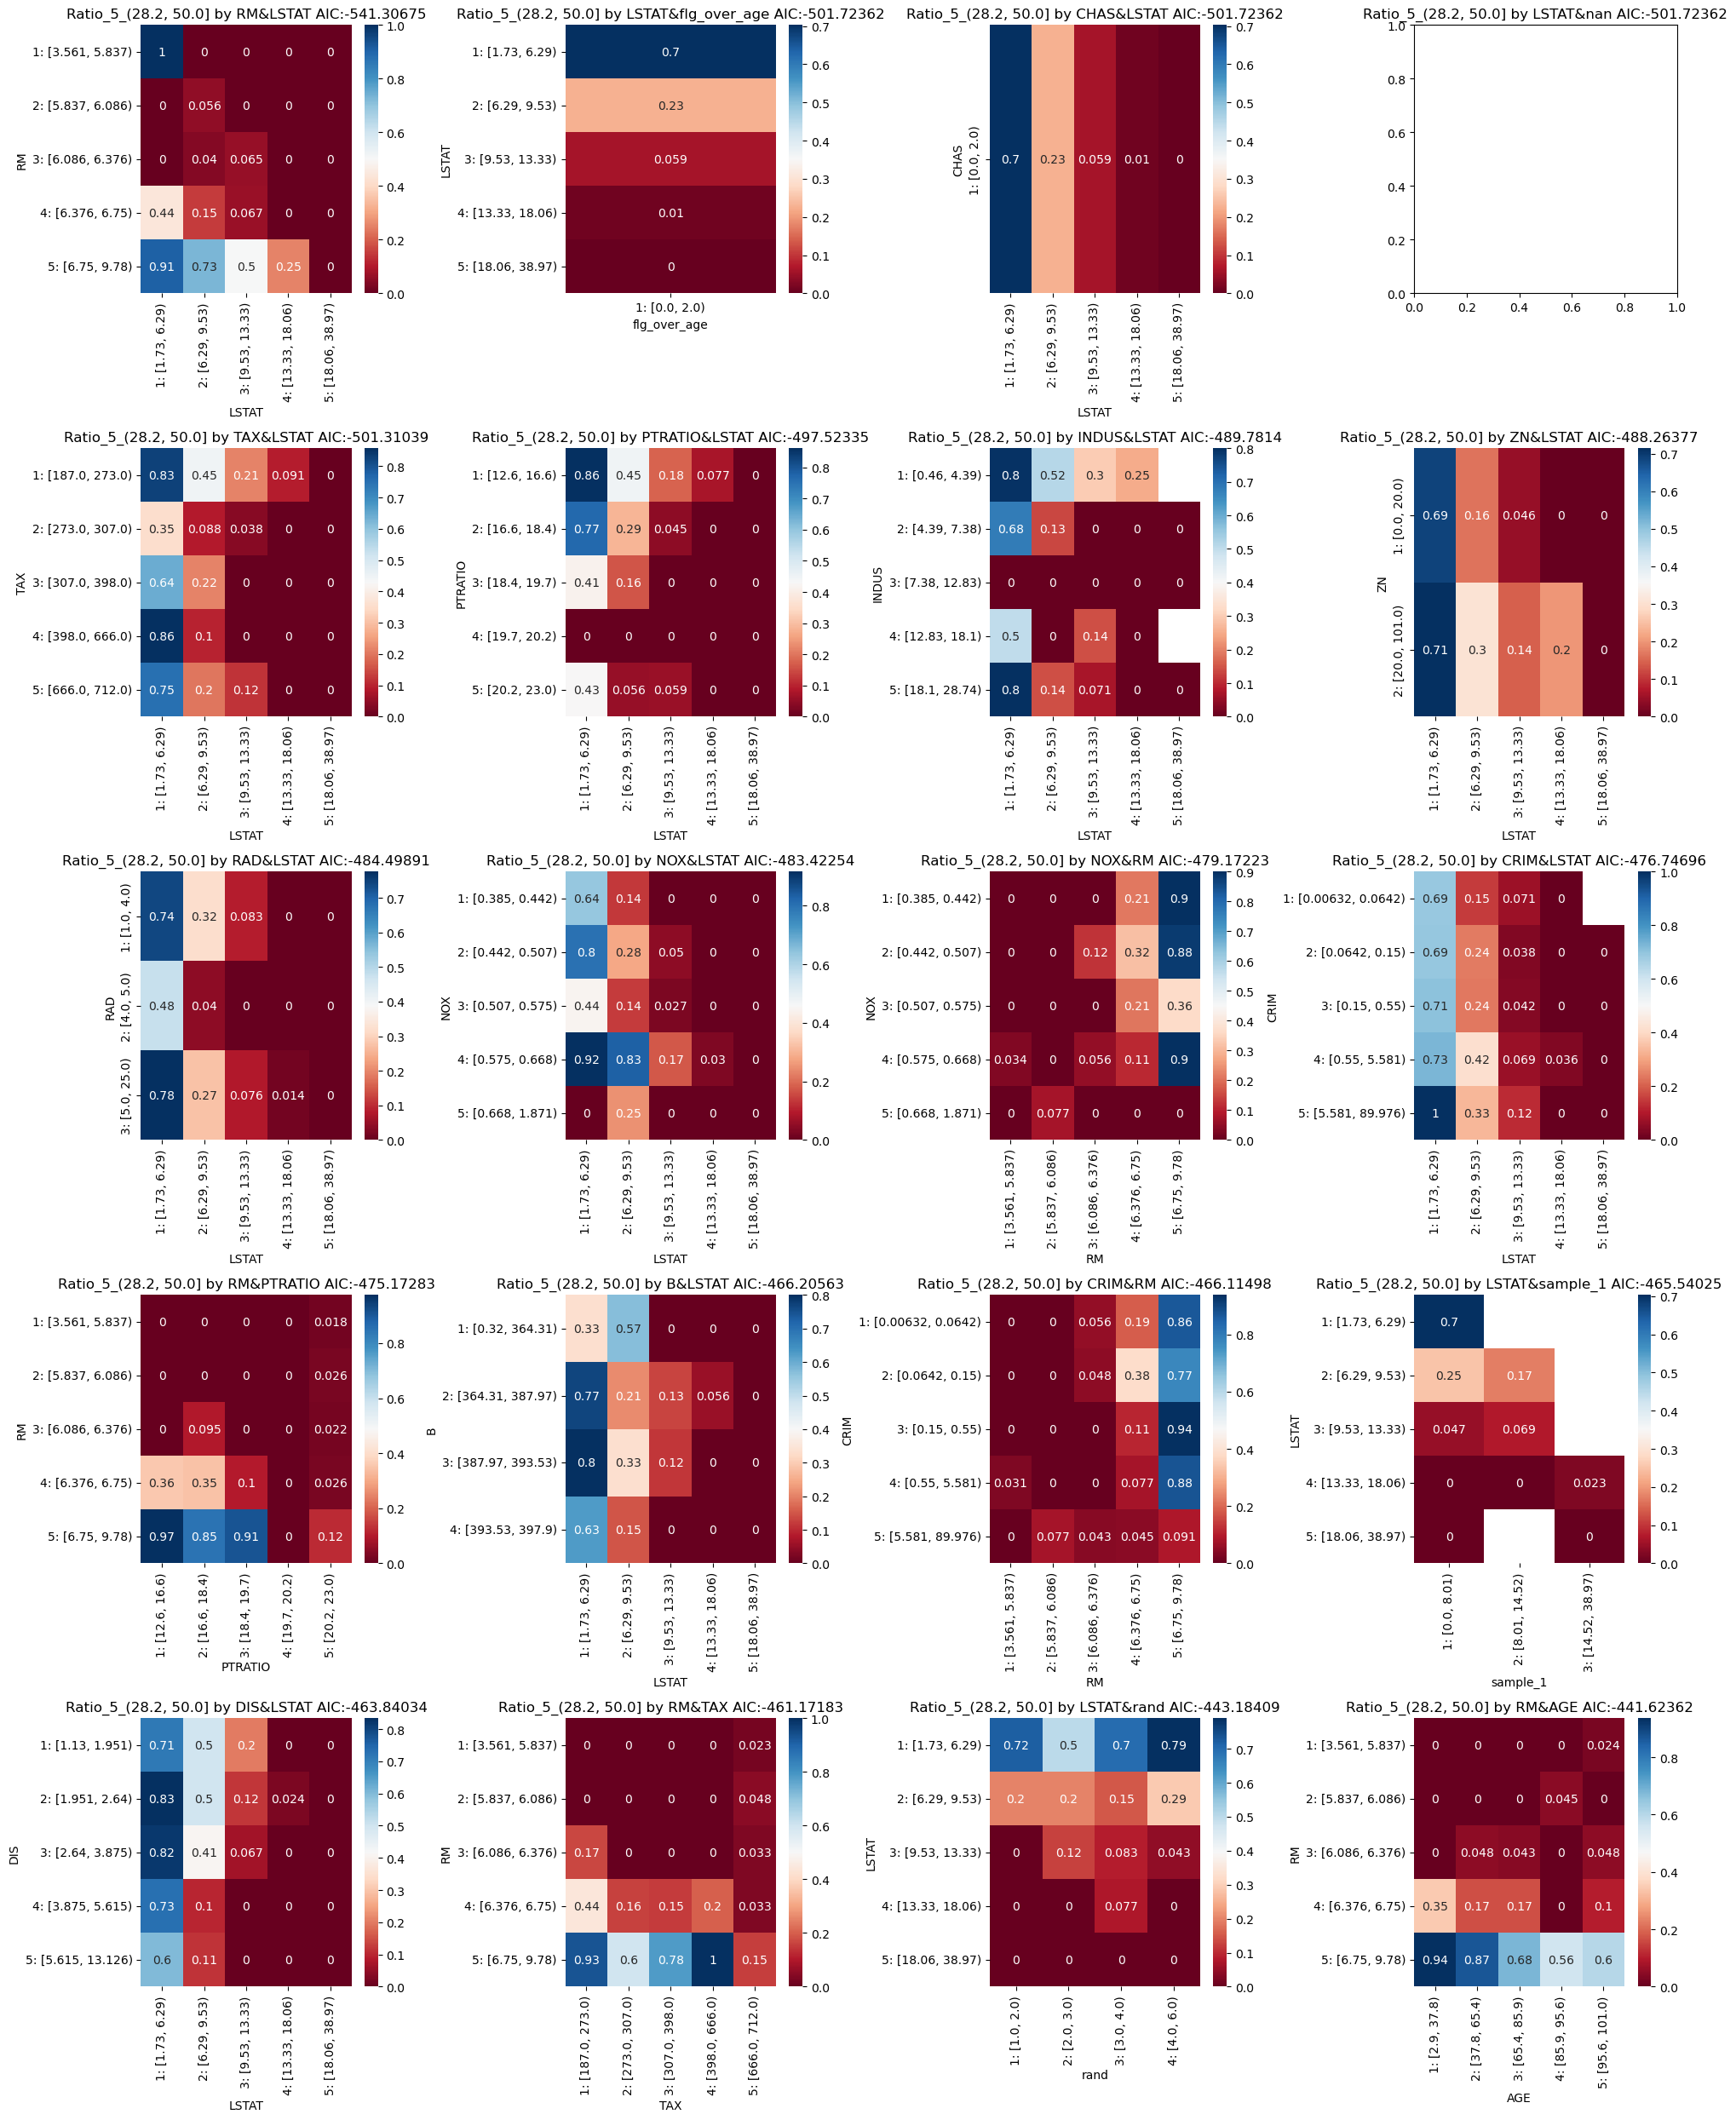

In [32]:
cat2_2.heatmap("Ratio_5_(28.2, 50.0]")

In [33]:
mom = pd.DataFrame()
mom["true"] = ["male"]
mom["age"] = ["over30"]
mom["hope"] = ["male"]
mom = mom.sample(165,replace = True)

mof = pd.DataFrame()
mof["true"] = ["male"]
mof["age"] = ["over30"]
mof["hope"] = ["female"]
mof = mof.sample(22,replace = True)

mum = pd.DataFrame()
mum["true"] = ["male"]
mum["age"] = ["under30"]
mum["hope"] = ["male"]
mum = mum.sample(584,replace = True)

muf = pd.DataFrame()
muf["true"] = ["male"]
muf["age"] = ["under30"]
muf["hope"] = ["female"]
muf = muf.sample(61,replace = True)


fom = pd.DataFrame()
fom["true"] = ["female"]
fom["age"] = ["over30"]
fom["hope"] = ["male"]
fom = fom.sample(113,replace = True)

fof = pd.DataFrame()
fof["true"] = ["female"]
fof["age"] = ["over30"]
fof["hope"] = ["female"]
fof = fof.sample(125,replace = True)

fum = pd.DataFrame()
fum["true"] = ["female"]
fum["age"] = ["under30"]
fum["hope"] = ["male"]
fum = fum.sample(332,replace = True)

fuf = pd.DataFrame()
fuf["true"] = ["female"]
fuf["age"] = ["under30"]
fuf["hope"] = ["female"]
fuf = fuf.sample(511,replace = True)

sample_df = pd.concat([mom,mof,mum,muf,fom,fof,fum,fuf],axis = 0)
sample_df.reset_index(inplace = True,drop = True)

In [34]:
X_sample2 = sample_df.drop("hope",axis = 1)
y_sample2 = sample_df["hope"].copy()

In [35]:
cat2 = CATDAP02()
cat2.fit(X_sample2,y_sample2)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.39it/s]

AIC calculation is finished


In [36]:
cat2.AIC_summary_all

feature_name_1 feature_name_2        AIC
0           true            age -527.88684
1           true            NaN -526.07768
2            age            NaN   -0.10883

In [37]:
cat2.AIC_table_all

feature_name_1 feature_name_2  missing_ratio_of_the_feature_1  \
0            true            age                             0.0   
1            true            age                             0.0   
2            true            age                             0.0   
3            true            age                             0.0   
4            true            age                             0.0   
5            true            NaN                             0.0   
6            true            NaN                             0.0   
7            true            NaN                             0.0   
8             age            NaN                             0.0   
9             age            NaN                             0.0   
10            age            NaN                             0.0   

    missing_ratio_of_the_feature_2        AIC  category_1  category_2  female  \
0                              0.0 -527.88684   1: female   1: over30     125   
1                              0.0 -527.88684   1: female  2: under30     511   
2                              0.0 -527.88684     2: male   1: over30      22   
3                              0.0 -527.88684     2: male  2: under30      61   
4                              0.0 -527.88684         All                 719   
5                              NaN -526.07768   1: female         NaN     636   
6                              NaN -526.07768     2: male         NaN      83   
7                              NaN -526.07768         All         NaN     719   
8                              NaN   -0.10883   1: over30         NaN     147   
9                              NaN   -0.10883  2: under30         NaN     572   
10                             NaN   -0.10883         All         NaN     719   

    male   All  Ratio_female  Ratio_male  
0    113   238       0.52521     0.47479  
1    332   843       0.60617     0.39383  
2    165   187       0.11765     0.88235  
3    584   645       0.09457     0.90543  
4   1194  1913       0.37585     0.62415  
5    445  1081       0.58834     0.41166  
6    749   832       0.09976     0.90024  
7   1194  1913       0.37585     0.62415  
8    278   425       0.34588     0.65412  
9    916  1488       0.38441     0.61559  
10  1194  1913       0.37585     0.62415

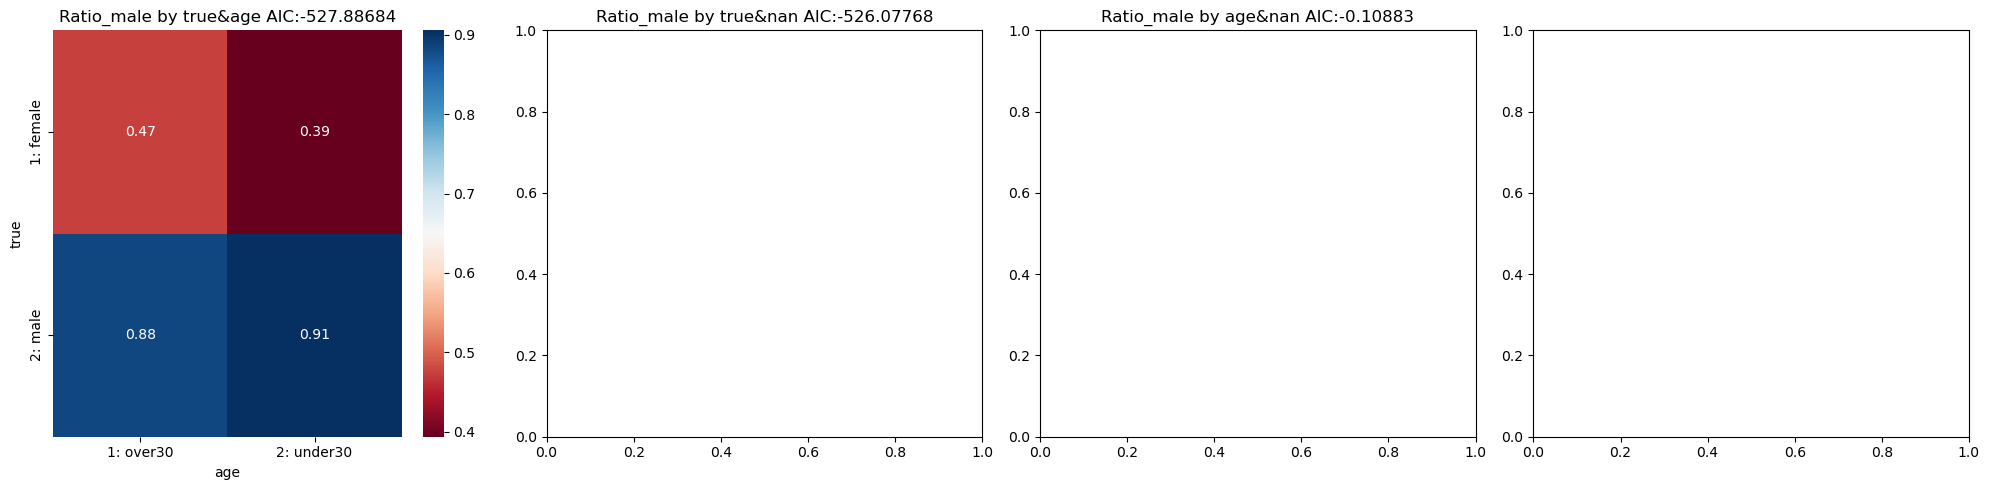

In [38]:
cat2.heatmap("Ratio_male")